In [51]:
import pandas as pd
import math
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
import pickle



df = pd.read_csv("AAPL.csv", index_col='Date', parse_dates=True)
print(df.head())

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.100178  469033600
1980-12-15  0.122210  0.122210  0.121652  0.121652   0.094952  175884800
1980-12-16  0.113281  0.113281  0.112723  0.112723   0.087983  105728000
1980-12-17  0.115513  0.116071  0.115513  0.115513   0.090160   86441600
1980-12-18  0.118862  0.119420  0.118862  0.118862   0.092774   73449600


In [3]:
df['HL_PCT'] = (df['High'] - df['Low']) / df['Close'] * 100.0

In [4]:
df['PCT_change'] = (df['Close'] - df['Open']) / df['Open'] * 100.0

## New DataFrame

In [5]:
df = df[['Close', 'HL_PCT', 'PCT_change', 'Volume']]
print(df.head())

      Close    HL_PCT  PCT_change     Volume
0  0.128348  0.434756    0.000000  469033600
1  0.121652  0.458685   -0.456591  175884800
2  0.112723  0.495019   -0.492580  105728000
3  0.115513  0.483063    0.000000   86441600
4  0.118862  0.469452    0.000000   73449600


In [6]:
forcast_col = 'Close'
df.fillna(value=-9999, inplace=True ) # replace missing data with -99,999.
forcast_out = int(math.ceil(0.01 * len(df))) # We're saying we want to forecast out 1% of the entire length of the dataset

In [7]:
df['label'] = df[forcast_col].shift(-forcast_out) # Now we have the data that comprises our features and labels

In [8]:
df.head()

,Close,HL_PCT,PCT_change,Volume,label
0,0.128348,0.434756,0.000000,469033600,0.119978
1,0.121652,0.458685,-0.456591,175884800,0.122768
2,0.112723,0.495019,-0.492580,105728000,0.125000
3,0.115513,0.483063,0.000000,86441600,0.122768
4,0.118862,0.469452,0.000000,73449600,0.126674


In [9]:
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X = X[:-forcast_out]
df.dropna(inplace=True)
y = np.array(df['label'])

C:\Users\Almas\AppData\Local\Temp\ipykernel_11332\226496446.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'],1))
C:\Python37\lib\site-packages\sklearn\preprocessing\_data.py:239: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## SVR

In [11]:
clf = svm.SVR()

In [12]:
clf.fit(X_train, y_train)

SVR()

In [13]:
confidance = clf.score(X_test, y_test)

In [14]:
print(confidance)

0.9427234785034442


## Linear Regression

In [15]:
clf = LinearRegression(n_jobs=-1)# n_jobs/ you can specify exactly how many threads you'll want. If you put in -1 for the value, then the algorithm will use all available threads.

In [16]:
clf.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [17]:
confidance_1 = clf.score(X_test, y_test)

In [18]:
print(confidance_1)

0.9645281640715387


In [19]:
clf = LinearRegression(n_jobs=-1)

In [20]:
for k in ['linear','poly','rbf','sigmoid']:
    clf = svm.SVR(kernel=k)
    clf.fit(X_train, y_train)
    confidence = clf.score(X_test, y_test)
    print(k,confidence)
    

linear 0.9645254834433403
poly 0.6019926837798784
rbf 0.9427234785034442
sigmoid -26.530820644841842


In [22]:
X.shape

(10258, 4)

In [23]:
y.shape

(10363,)

## Forcasting and Prediction

In [26]:
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
# X = X[:-forcast_out]
df.dropna(inplace=True)
y = np.array(df['label'])
X_lately = X[-forcast_out:]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)
print(confidence)

0.9741405322635278


C:\Users\Almas\AppData\Local\Temp\ipykernel_11332\2334645580.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'],1))
C:\Python37\lib\site-packages\sklearn\preprocessing\_data.py:239: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(


In [27]:
forcest_set = clf.predict(X_lately)

In [34]:
print(f"forcast:{forcest_set}", f"cofidance:{confidence}", f"forcast_out:{forcast_out}")

forcast:[162.41972085 164.04071378 165.72983832 165.628374   164.25974657
 163.33305871 164.49778152 169.52788524 168.05907235 168.83445625
 170.08988167 170.79173376 173.4464404  171.72706555 170.56196328
 165.02580699 165.56099211 164.01844797 164.99297985 164.70424465
 161.71369692 158.26954671 158.78460354 161.46824318 162.53320776
 162.64082084 160.9340554  157.12751955 158.13075532 156.68717788
 157.95495066 154.09945365 156.23097546 157.22900498 158.62294377
 158.20386715 158.12454367 156.68023155 156.00668175 159.15106892
 160.32629907 162.24986136 164.67943906 165.22309645 165.46768231
 164.59997031 164.54669285 165.29631717 164.76825786 168.89401833
 165.8273191  164.8954302  166.08329982 167.69735807 167.11151841
 167.47104055 166.53227915 166.93070843 163.76972017 163.7051259
 166.05080846 166.0641786  167.15442817 169.92815687 174.77540708
 177.72710356 178.26999837 178.66284242 179.24792593 173.63115047
 177.36222327 182.9652486  182.43321117 181.29436019 179.19476227
 18

In [36]:
import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [45]:
df['Forecast'] = np.nan

### We need to first grab the last day in the dataframe, and begin assigning each new forecast to a new day 

In [46]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

### Now we have the next day we wish to use, and one_day is 86,400 seconds. Now we add the forecast to the existing dataframe:

In [47]:
for i in forcest_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

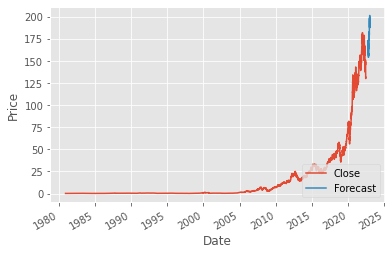

In [50]:
df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

### Pickling and Scaling

In [53]:
with open('linearregression.pickle', 'wb') as f:
    pickle.dump(clf, f)

In [54]:
pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)